### Bonus Analysis
* As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:

1.Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) This step may require some research. Feel free to use the code below to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/<your_db_name>')
connection = engine.connect()

* Consult SQLAlchemy documentation for more information.

* If using a password, do not upload your password to your GitHub repository. See https://www.youtube.com/watch?v=2uaTPmNvH0I and https://help.github.com/en/github/using-git/ignoring-files for more information.

2.Create a histogram to visualize the most common salary ranges for employees.


3.Create a bar chart of average salary by title.

In [1]:
# Import dependencies:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import url

In [2]:
# Creating engine to access the database:
engine = create_engine(url)
connection = engine.connect()

In [3]:
# Reading the 'salaries' CSV file:
emp_salaries = pd.read_sql("SELECT * FROM salaries", connection)
emp_salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


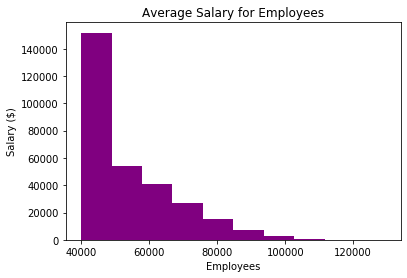

In [4]:
# Creating a histogram to visualize the most common salary ranges for employees:
emp_salaries['salary'].plot(kind='hist', color='purple')
plt.title('Average Salary for Employees')
plt.xlabel('Employees')
plt.ylabel('Salary ($)')
plt.show()

In [5]:
# Reading the 'employees' and 'titles' CSV files:
employees = pd.read_sql("SELECT * FROM employees", connection)
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [6]:
emp_titles = pd.read_sql("SELECT * FROM titles", connection)
emp_titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
# Merging 'employees' and 'salaries' first:
emp_salary_merge = pd.merge(employees, emp_salaries, on='emp_no', how='inner')
emp_salary_merge.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [8]:
# Renaming the column 'emp_title_id' to match the other dataframe upon final merge:
emp_salary_merge = emp_salary_merge.rename(columns={'emp_title_id': 'title_id'})
emp_salary_merge.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [9]:
# Final merging 'emp_salary_merge' and 'titles' last:
emp_salaries_by_title = pd.merge(emp_salary_merge, emp_titles, on='title_id', how='inner')
emp_salaries_by_title.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


In [10]:
# Creating a bar chart of average salary by title:
